In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

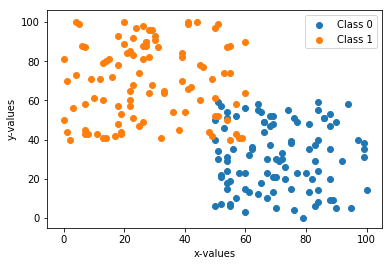

In [2]:
data=[]
label=[]
for c in range(0,100,1):
    dataPoint=[]
    dataPoint.append(rand.randint(50,100))
    dataPoint.append(rand.randint(0,60))
    data.append(dataPoint)
    label.append(0)

for c in range(0,100,1):
    dataPoint=[]
    dataPoint.append(rand.randint(0,60))
    dataPoint.append(rand.randint(40,100))
    data.append(dataPoint)
    label.append(1)

data=np.array(data)
plt.scatter(data[:100,0],data[:100,1],label="Class 0")
plt.scatter(data[100:,0],data[100:,1],label="Class 1")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.legend()

In [3]:
dataNew=data
labelNew=label

d=dataNew
l=labelNew

print (d[0])
d=np.insert(d,0,1,axis=1)
print (d[0])
w=np.zeros(3)

[83 37]
[ 1 83 37]


In [4]:
w=np.zeros(3)
def sigma(x):
    return 1/(1+np.exp(-x))

def calError(weights,data,label):
    predictedValue=sigma(np.dot(np.transpose(weights),data))
    error=(predictedValue-label)**2
    return error/2

def calGradError(weights,data,label):
    predictedValue=sigma(np.dot(np.transpose(weights),data))
    gradError=(predictedValue-label)*(predictedValue)*(1-predictedValue)*(data)
    return gradError

def stochGrad(weights,dataArray,labelArray,eeta):
    newWeights=weights
    iegraph=[]
    error=0
    for c in range (0,1000,1):
        index=rand.randint(0,199)
        data=dataArray[index]
        label=labelArray[index]
        pred=sigma(np.dot(np.transpose(newWeights),data))
        if(pred>0.5 and label==1):
            error=error
        elif(pred<0.5 and label==0):
            error=error
        else:
            error=calError(newWeights,data,label)
            gradError=calGradError(newWeights,data,label)
            newWeights=newWeights-eeta*gradError
        iterationError=[]
        iterationError.append(c)
        iterationError.append(error)
        iegraph.append(iterationError)        
    return newWeights,iegraph
    
optimizedWeights,graph=stochGrad(w,d,l,1e-2)
w=optimizedWeights

[ 0.00223945 -0.39590902  0.33142559]


Text(0.5, 0.98, 'Evolution of error')

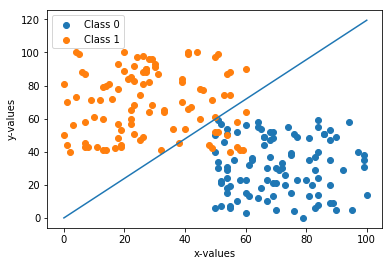

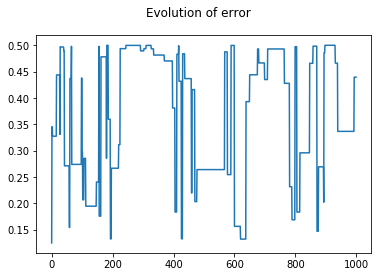

In [5]:
print (optimizedWeights)

plt.scatter(data[:100,0],data[:100,1],label="Class 0")
plt.scatter(data[100:,0],data[100:,1],label="Class 1")
plt.xlabel("x-values")
plt.ylabel("y-values")
x1=np.linspace(0,100,1000)
x2=np.linspace(0,100,1000)
y=-(w[0]+w[1]*x1)/w[2]
plt.plot(x1,y)
plt.legend()

fig=plt.figure(2)
graph=np.array(graph)
plt.plot(graph[:,0],graph[:,1])
plt.suptitle ("Evolution of error")